In [11]:
# Import libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
 
def create_cube(coords, axes, air = []):
    # Create Data
    data = np.zeros(axes, dtype=int)
    # print(air, coords)
    
    for coord in coords:
        data[coord[0]][coord[1]][coord[2]] = 1
        
    for coord in air:
        data[coord[0][0]][coord[0][1]][coord[0][2]] = coord[1]
        

    # Control Transparency
    alpha = 0.7
    # Control colour
    colors = np.array(data, "object")
    for i, x in enumerate(colors):
        for j, y in enumerate(x):
            for k, z in enumerate(y):
                if(colors[i][j][k] == 1):
                    colors[i][j][k] = [1, 0, 0, alpha]
                else:
                    # print(i,j,k)
                    colors[i][j][k] = [0, colors[i][j][k] / 8, 0, 1]
    
    # Plot figure
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Voxels is used to customizations of the
    # sizes, positions and colors.
    ax.voxels(data, facecolors=colors)
    # ax.view_init(-100, 0)

In [2]:
# Import libraries
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
 
def show_slice(data):
    # print(data)
    # print(air)
    cmap = ListedColormap([[x / 8, 0, 0] for x in range(0, 9)])
    plt.matshow(data, vmin=0, vmax=2)


3498


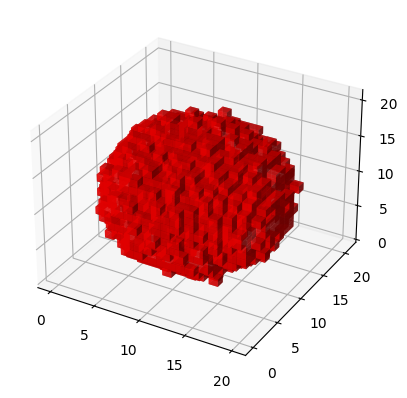

In [3]:
with open('input.txt', 'r') as f:
    input = f.read()
input = input.splitlines()
input = [tuple(map(int, x.split(","))) for x in input]
neighbors = {}
max_x = 0
max_y = 0
max_z = 0
for i, x in enumerate(input):
    neighbors[x] = []
    d, e, f = x
    if(d > max_x): max_x = d
    if(e > max_y): max_y = e
    if(f > max_z): max_z = f
    for j, y in enumerate(input):
        if(i == j): continue
        a, b, c = y
        check = sum([abs(d - a), abs(e - b), abs(f - c)])
        if(check == 1):
            neighbors[x].append(y)
total_faces = 0
for node in neighbors:
    total_faces += 6 - len(neighbors[node])
print(total_faces)
create_cube(input, [max_x + 2, max_y + 2, max_z + 2])

In [4]:
def flood_fill(data, start=(0, 0, 0), color = 0, boundary = 1):
    visited = []
    def flood_fill_internal(point):
        try:
            i, j, k = point
            if(point in visited or data[i][j][k] == boundary):
                return
            visited.append(point)
            data[i][j][k] = color
            neighbors = [(i + 1, j, k),(i - 1, j, k),(i, j + 1, k),(i, j - 1, k),(i, j, k + 1),(i, j, k - 1)]
            for neighbor in neighbors:
                flood_fill_internal(neighbor)
        except:
            return
    flood_fill_internal(start)
    return data


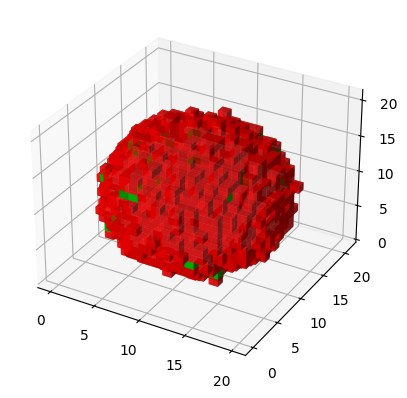

In [22]:
from math import inf

with open('input.txt', 'r') as f:
    input = f.read()
input = input.splitlines()
input = [tuple(map(int, x.split(","))) for x in input]
neighbors = {}
max_x = 0
max_y = 0
max_z = 0
minmax = {}
for i, x in enumerate(input):
    neighbors[x] = []
    d, e, f = x
    if(d > max_x): max_x = d
    if(e > max_y): max_y = e
    if(f > max_z): max_z = f
    if(d not in minmax.keys()): minmax[d] = []
    minmax[d].append((e, f))
    for j, y in enumerate(input):
        if(i == j): continue
        a, b, c = y
        check = sum([abs(d - a), abs(e - b), abs(f - c)])
        if(check == 1):
            neighbors[x].append(y)

total_faces = 0
for node in neighbors:
    total_faces += 6 - len(neighbors[node])

for x in minmax:
    temp = minmax[x].copy()
    minmax[x] = {}
    for y in temp:
        if(y[0] not in minmax[x].keys()): minmax[x][y[0]] = (inf, 0)
        zmin, zmax = minmax[x][y[0]]
        if(y[1] < zmin):
            zmin = y[1]
        if(y[1] > zmax):
            zmax = y[1]
        minmax[x][y[0]] = (zmin, zmax)

air_count = 0
air = []
cube = minmax.keys()
cube_max = (min(cube), max(cube))
for i in range(1, max_x + 2):
    if(i in cube):
        slice = minmax[i].keys()
    else:
        slice = [0, 0]
    slice_max = (min(slice), max(slice))
    for j in range(1, max_y + 2):
        if(slice and j in slice):
            line = minmax[i][j]
        else:
            line = False
        for k in range(1, max_z + 2):
            if (i, j, k) in input: continue
            check = [(i + 1, j, k),(i - 1, j, k),(i, j + 1, k),(i, j - 1, k),(i, j, k + 1),(i, j, k - 1)]
            check = len(list(filter(lambda x: x in input, check)))
            if(check >= 0 and line and i > cube_max[0] and i < cube_max[1] and j > slice_max[0] and j < slice_max[1
            ] and k > line[0] and k < line[1]):
                air_count += 1
                air.append(((i, j, k), check + 2))

create_cube(input, [max_x + 2, max_y + 2, max_z + 2], air)

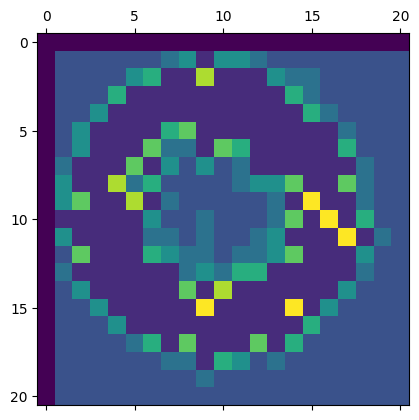

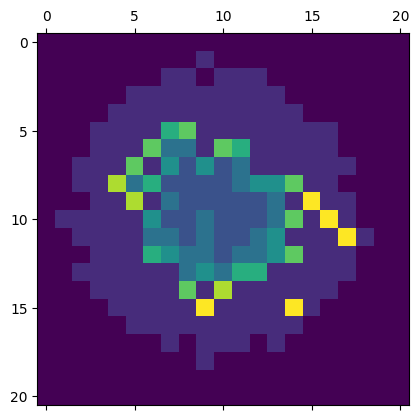

In [5]:
with open('input.txt', 'r') as f:
    input = f.read()
input = input.splitlines()
input = [tuple(map(int, x.split(","))) for x in input]
max_x = 0
max_y = 0
max_z = 0
for i, x in enumerate(input):
    d, e, f = x
    if(d > max_x): max_x = d
    if(e > max_y): max_y = e
    if(f > max_z): max_z = f


air_count = 0
air = []
for i in range(1, max_x + 2):
    for j in range(1, max_y + 2):
        for k in range(1, max_z + 2):
            if (i, j, k) in input: continue
            check = [(i + 1, j, k),(i - 1, j, k),(i, j + 1, k),(i, j - 1, k),(i, j, k + 1),(i, j, k - 1)]
            check = len(list(filter(lambda x: x in input, check)))
            if(check >= 0):
                air_count += 1
                air.append(((i, j, k), check + 2))

# Create Data
data = np.zeros([max_x + 2, max_y + 2, max_z + 2], dtype=int)    
for coord in input:
    data[coord[0]][coord[1]][coord[2]] = 1
    
for coord in air:
    data[coord[0][0]][coord[0][1]][coord[0][2]] = coord[1]

# for x in range(0, max_x):
show_slice(data[5])
data = flood_fill(data)
# for x in range(0, max_x):
show_slice(data[5])
data = np.where(data > 0, np.ones_like(data), np.zeros_like(data))




In [5]:
def show_all_slices(data, max_x):
    for x in range(0, max_x):
        show_slice(data[x])

2008


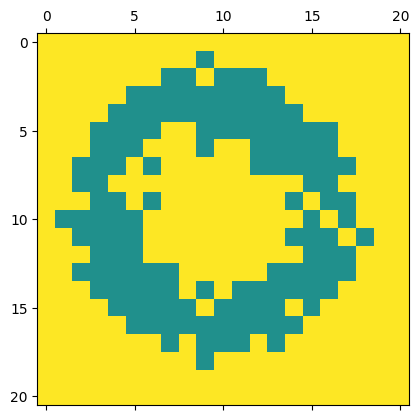

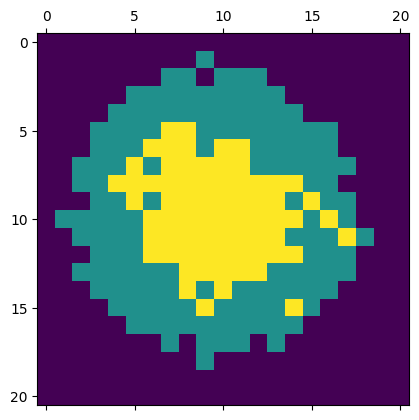

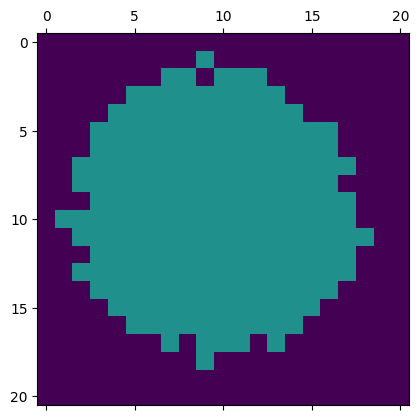

In [6]:
from math import inf

with open('input.txt', 'r') as f:
    input = f.read()
input = input.splitlines()
input = [tuple(map(int, x.split(","))) for x in input]
max_x = 0
max_y = 0
max_z = 0
for i, x in enumerate(input):
    d, e, f = x
    if(d > max_x): max_x = d
    if(e > max_y): max_y = e
    if(f > max_z): max_z = f

# Create Data
data = np.zeros([max_x + 2, max_y + 2, max_z + 2], dtype=int)    
for coord in input:
    data[coord[0]][coord[1]][coord[2]] = 1

data = np.where(data <= 0, np.full_like(data, 2), data)
data[0][0][0] = 0
show_slice(data[5])
data = flood_fill(data)
show_slice(data[5])
data = np.where(data > 0, np.ones_like(data), np.zeros_like(data))
show_slice(data[5])
total_faces = 0
for i, x in enumerate(data):
    for j, y in enumerate(x):
        for k, z in enumerate(y):
            if(z != 1): continue
            neighbors = [(i + 1, j, k),(i - 1, j, k),(i, j + 1, k),(i, j - 1, k),(i, j, k + 1),(i, j, k - 1)]
            neighbors = sum(list(map(lambda x: data[x[0]][x[1]][x[2]], neighbors)))
            total_faces += 6 - neighbors

print(total_faces)